Import libraries

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil

# Find the Root of the Function

Let's start by looking at a sample function and plotting it

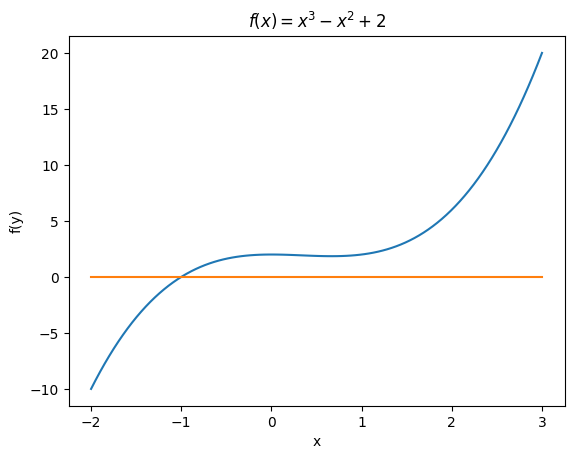

In [177]:
def f(x):
    return x**3 - x**2 + 2

x = np.linspace(-2,3,100)
plt.plot(x,f(x))
plt.plot(x,np.zeros(x.shape))
plt.xlabel('x')
plt.ylabel('f(y)')
plt.title(r'$f(x) = x^3 - x^2 + 2$')
plt.show()

# Bisection Method

How many iterations will it take to converge?

In [178]:
def bisectionNumIterations(x0,x1,eps):
    return ceil(log2(abs(x1-x0) / eps))

x0 = -2
x1 = 3
eps = 1e-6

numIter = bisectionNumIterations(x0,x1,eps)
print(f'x0 = {x0}')
print(f'x1 = {x1}')
print(f'tolerance = {eps}')
print('------------------')
print(f'ITERATIONS TO CONVERGE WITH BISECTION = {numIter}')

x0 = -2
x1 = 3
tolerance = 1e-06
------------------
ITERATIONS TO CONVERGE WITH BISECTION = 23


Bisection method algorithm

In [179]:
def bisection(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** BISECTION METHOD ***')

    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True
    
    # loop as long as the residual is greater than the tolerance
    while condition:
        # calculate midpoint
        xNew = (x0 + x1)/2
        
        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew

        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'Not Convergent within {maxIter} iterations')
            break
        
        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}')

    return xNew, iterations, residuals

Test the algorithm and plot it

*** BISECTION METHOD ***
final x-value: -1.0000000596046448
iterations: 23
residual: -2.9802323808780784e-07


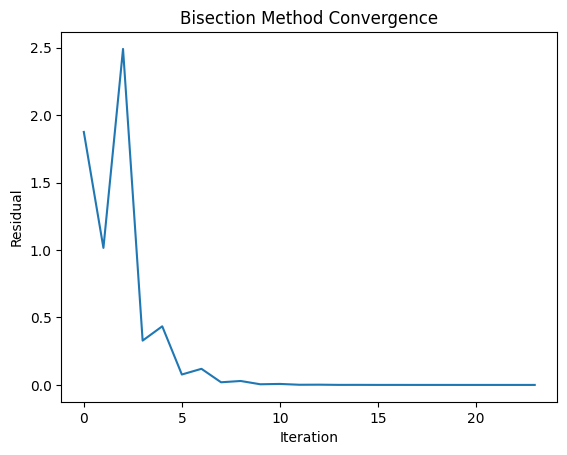

In [180]:
x0 = -2
x1 = 3
tol = 1e-6

xNew, iterations, residuals = bisection(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Bisection Method Convergence')
plt.show()


# Secant Method

Secant method algorithm

In [181]:
def secant(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** SECANT METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the residual is greater than the tolerance
    while condition:
        # calculate new x-value and apply secant method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        x0 = x1
        x1 = xNew
        
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i}')
    print(f'residual: {func(xNew)}')

    return xNew, iterations, residuals

Test the algorithm and plot it

*** SECANT METHOD ***
final x-value: -0.9999999530798953
iterations: 8
residual: 2.3460051457036002e-07


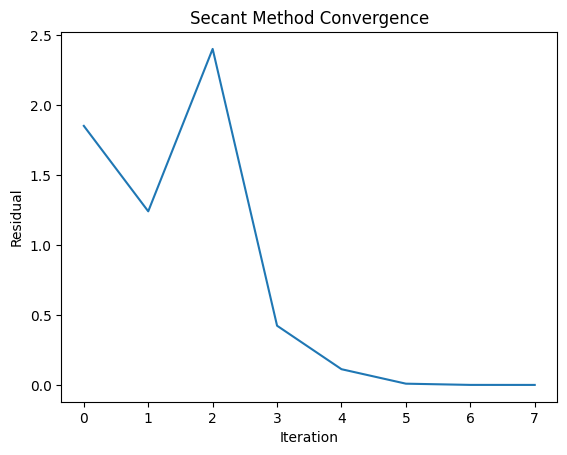

In [182]:
x0 = -2
x1 = 3
tol = 1e-6

xNew, iterations, residuals = secant(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Secant Method Convergence')
plt.show()

# Regula-Falsi Method

Regula-Falsi method algorithm

In [183]:
def regula_falsi(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the residual is greater than the tolerance
    while condition:
        # calculate new x-value and apply secant method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))

        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew
        
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i}')
    print(f'residual: {func(xNew)}')

    return xNew, iterations, residuals

Test the algorithm and plot it

*** REGULA-FALSI METHOD ***
final x-value: -0.9999998735667852
iterations: 24
residual: 6.321660099839477e-07


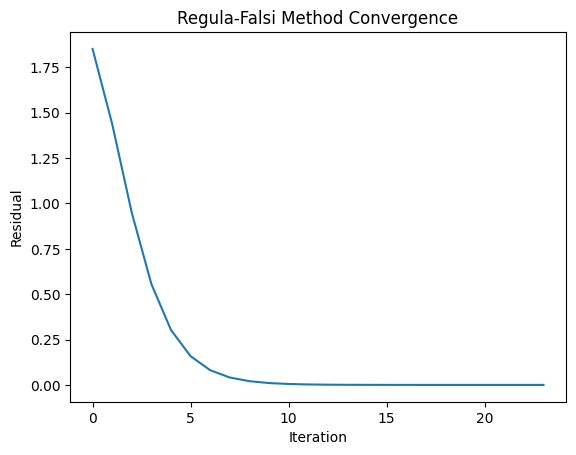

In [184]:
x0 = -2
x1 = 3
tol = 1e-6

xNew, iterations, residuals = regula_falsi(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Regula-Falsi Method Convergence')
plt.show()

# Newton-Raphson Method

Newton-Raphson method algorithm

In [ ]:
def newton_raphson(func,dFunc,x0,eps,)